In this project we analyse the daily electricity consumption by clients in France. The data set comes from Enedis Open Data (https://data.enedis.fr/explore/dataset/bilan-electrique-jour).

# Exploratory Data Analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#path = '/kaggle/input/bilan-electrique-transpose/bilan-electrique-transpose.csv'
path = 'bilan-electrique-transpose/bilan-electrique-transpose.csv'
electricity_df = pd.read_csv(path, sep=";")

electricity_df.head()

,Jour,Catégorie client,Puissance moyenne journalière (W)
0,2020-03-08,Puissance moyenne journalière de la consommati...,9.233349e+09
1,2020-03-08,Puissance moyenne journalière de la consommati...,4.776666e+09
2,2020-03-08,Puissance moyenne journalière de la production...,9.258870e+05
3,2020-03-08,Puissance moyenne journalière de la production...,1.080236e+06
4,2020-03-09,Puissance moyenne journalière de la consommati...,1.416345e+09


In [15]:
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32868 entries, 0 to 32867
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Jour                               32868 non-null  object 
 1   Catégorie client                   32868 non-null  object 
 2   Puissance moyenne journalière (W)  32868 non-null  float64
dtypes: float64(1), object(2)
memory usage: 770.5+ KB


In [16]:
electricity_df['Catégorie client'].value_counts()

Catégorie client
Puissance moyenne journalière de la consommation totale HTA (W)                              1826
Puissance moyenne journalière de la consommation profilée BT INF 36 Professionnelle (W)      1826
Puissance moyenne journalière de la production cogénération profilée (W)                     1826
Puissance moyenne journalière de la production autres profilée (W)                           1826
Puissance moyenne journalière de la consommation profilée HTA (W)                            1826
Puissance moyenne journalière de la production télérelevée totale (W)                        1826
Puissance moyenne journalière de la consommation télérelevée BT INF 36 Résidentielle (W)     1826
Puissance moyenne journalière de la consommation profilée BT INF 36 Résidentielle (W)        1826
Puissance moyenne journalière de la consommation télérelevée HTA (W)                         1826
Puissance moyenne journalière de la consommation télérelevée BT SUP 36 (W)                   1826
Pui

On va s'intéresser aux particuliers. "Télérelévée" signifie que les données sont exactes et non estimées.

In [17]:
condition = electricity_df['Catégorie client'] == 'Puissance moyenne journalière de la consommation télérelevée BT INF 36 Résidentielle (W)'
particulier_df = electricity_df[condition].reset_index(drop=True)


In [18]:
particulier_df.head()

,Jour,Catégorie client,Puissance moyenne journalière (W)
0,2020-03-16,Puissance moyenne journalière de la consommati...,41767089.0
1,2020-07-24,Puissance moyenne journalière de la consommati...,27761813.0
2,2021-05-21,Puissance moyenne journalière de la consommati...,74280039.0
3,2021-07-06,Puissance moyenne journalière de la consommati...,60733462.0
4,2021-10-29,Puissance moyenne journalière de la consommati...,115199945.0


In [19]:
particulier_df = particulier_df.drop(['Catégorie client'], axis=1)

In [20]:
particulier_df = particulier_df.sort_values(by="Jour").reset_index(drop=True).rename(columns={'Puissance moyenne journalière (W)':'Puissance_journaliere'})
particulier_df["Jour"] = pd.to_datetime(particulier_df["Jour"])
particulier_df.head()

,Jour,Puissance_journaliere
0,2020-03-08,50677960.0
1,2020-03-09,46919640.0
2,2020-03-10,44815306.0
3,2020-03-11,40526164.0
4,2020-03-12,38672414.0


In [21]:
particulier_df.tail()

,Jour,Puissance_journaliere
1821,2025-03-03,388483908.0
1822,2025-03-04,361809759.0
1823,2025-03-05,352747024.0
1824,2025-03-06,312151535.0
1825,2025-03-07,291858451.0


In [22]:
particulier_df['Puissance_journaliere'].describe()

count    1.826000e+03
mean     1.806159e+08
std      1.232125e+08
min      2.404060e+07
25%      9.700872e+07
50%      1.526736e+08
75%      2.405721e+08
max      6.044626e+08
Name: Puissance_journaliere, dtype: float64

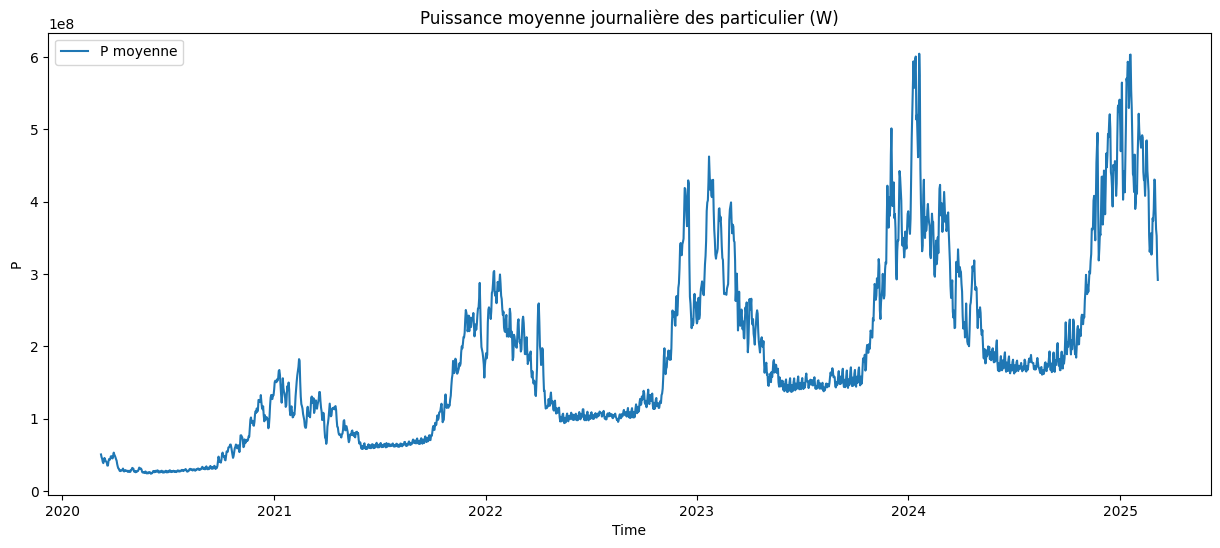

In [23]:
plt.figure(figsize=(15, 6))
plt.plot(particulier_df["Jour"], particulier_df["Puissance_journaliere"], label='P moyenne')
plt.title('Puissance moyenne journalière des particulier (W)')
plt.xlabel('Time')
plt.ylabel('P')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Puissance moyenne journalière des particuliers (W)')

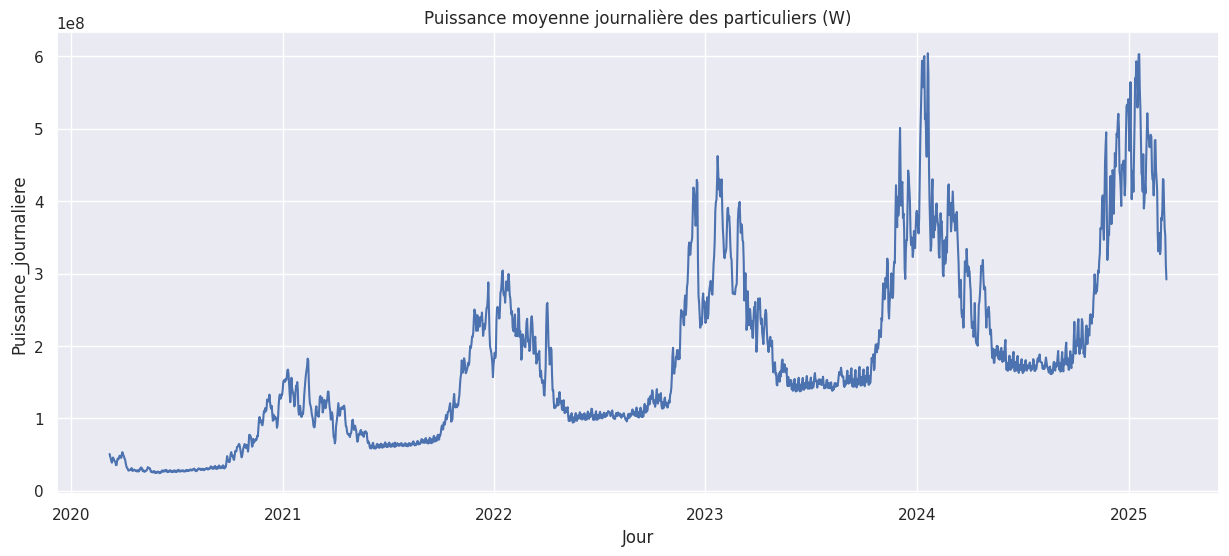

In [24]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(15, 6))
sns.lineplot(particulier_df, x="Jour", y="Puissance_journaliere")
plt.title('Puissance moyenne journalière des particuliers (W)')

# Dataset Meteo

To increase the accuracy of our model, we decide to add features from a weather dataset from France. (https://www.data.gouv.fr/fr/datasets/observation-meteorologique-historiques-france-synop/)

In [25]:
#path_meteo = '/kaggle/input/observation-meteorologique-historiques-france/observation-meteorologique-historiques-france-synop.csv'
path_meteo = 'observation-meteorologique-historiques-france/observation-meteorologique-historiques-france-synop.csv'
meteo_df = pd.read_csv(path_meteo, sep=";")

<ipython-input-25-a9fed6b8bc47>:2: DtypeWarning: Columns (74,78) have mixed types. Specify dtype option on import or set low_memory=False.
  meteo_df = pd.read_csv(path_meteo, sep=";")


In [26]:
meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44552 entries, 0 to 44551
Data columns (total 82 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ID OMM station                                             44552 non-null  int64  
 1   Date                                                       44552 non-null  object 
 2   Pression au niveau mer                                     44477 non-null  float64
 3   Variation de pression en 3 heures                          44537 non-null  float64
 4   Type de tendance barométrique                              44539 non-null  float64
 5   Direction du vent moyen 10 mn                              44518 non-null  float64
 6   Vitesse du vent moyen 10 mn                                44518 non-null  float64
 7   Température                                                44480 non-null  float64
 8   Point 

In [27]:
meteo_df = meteo_df.sort_values(by='Date').reset_index(drop=True)

In [28]:
meteo_df

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
0,7630,2010-01-01T00:00:00+00:00,99430.0,200.0,2.0,270.0,7.2,280.45,278.45,87.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,1
1,7630,2010-01-01T03:00:00+00:00,99460.0,30.0,3.0,270.0,10.8,280.65,275.95,72.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,1
2,7630,2010-01-01T06:00:00+00:00,99560.0,90.0,3.0,260.0,11.3,280.55,274.85,67.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,1
3,7630,2010-01-01T09:00:00+00:00,99950.0,380.0,3.0,260.0,10.8,279.15,276.45,83.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,1
4,7630,2010-01-01T12:00:00+00:00,100200.0,250.0,1.0,270.0,9.8,280.35,277.15,80.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44547,7630,2025-03-20T06:00:00+00:00,101840.0,-70.0,6.0,130.0,9.9,284.95,281.75,81.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
44548,7630,2025-03-20T09:00:00+00:00,101920.0,90.0,3.0,120.0,10.8,287.25,282.45,73.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
44549,7630,2025-03-20T12:00:00+00:00,101830.0,-90.0,6.0,130.0,11.5,287.45,283.65,78.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
44550,7630,2025-03-20T15:00:00+00:00,101710.0,-120.0,6.0,120.0,13.2,286.75,282.55,76.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3


In [29]:
meteo_df['department (name)'].value_counts()

department (name)
Haute-Garonne               44398
Bas-Rhin                       11
Finistère                      11
Haute-Vienne                   10
Gironde                         9
Orne                            9
Haut-Rhin                       8
Indre-et-Loire                  7
Aube                            7
Hautes-Pyrénées                 7
Calvados                        5
Nord                            5
Puy-de-Dôme                     5
Vienne                          5
Essonne                         5
Ille-et-Vilaine                 4
Somme                           4
Loire-Atlantique                4
Lot                             4
Seine-Maritime                  3
Côte-d'Or                       3
Marne                           3
Landes                          3
Haute-Loire                     2
Saint-Pierre-et-Miquelon        2
Guyane                          2
Bouches-du-Rhône                2
Aveyron                         2
Meurthe-et-Moselle            

In [30]:
meteo_df[meteo_df['Date'].astype(str).str.contains('2020-03-08')]

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
29772,7630,2020-03-08T00:00:00+00:00,102660.0,-60.0,8.0,320.0,1.2,282.15,279.05,81.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29773,7630,2020-03-08T03:00:00+00:00,102480.0,-180.0,6.0,280.0,1.7,280.45,278.75,89.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29774,7630,2020-03-08T06:00:00+00:00,102410.0,-70.0,6.0,250.0,1.2,280.95,279.85,93.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29775,7630,2020-03-08T09:00:00+00:00,102500.0,90.0,1.0,180.0,1.6,281.85,279.95,88.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29776,7630,2020-03-08T12:00:00+00:00,102320.0,-140.0,8.0,280.0,1.8,287.45,280.45,63.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29777,7630,2020-03-08T15:00:00+00:00,102130.0,-190.0,6.0,310.0,3.6,287.25,278.85,57.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29778,7630,2020-03-08T18:00:00+00:00,102200.0,60.0,3.0,280.0,5.3,285.35,281.45,77.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29779,7630,2020-03-08T21:00:00+00:00,102270.0,60.0,1.0,270.0,5.2,284.15,282.05,87.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3


In [31]:
meteo_df[(meteo_df['Date'] >= '2020-03-08') & (meteo_df['Date'] <= '2025-03-07') ]

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,...,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee
29772,7630,2020-03-08T00:00:00+00:00,102660.0,-60.0,8.0,320.0,1.2,282.15,279.05,81.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29773,7630,2020-03-08T03:00:00+00:00,102480.0,-180.0,6.0,280.0,1.7,280.45,278.75,89.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29774,7630,2020-03-08T06:00:00+00:00,102410.0,-70.0,6.0,250.0,1.2,280.95,279.85,93.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29775,7630,2020-03-08T09:00:00+00:00,102500.0,90.0,1.0,180.0,1.6,281.85,279.95,88.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
29776,7630,2020-03-08T12:00:00+00:00,102320.0,-140.0,8.0,280.0,1.8,287.45,280.45,63.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44436,7630,2025-03-06T09:00:00+00:00,101740.0,0.0,4.0,130.0,10.2,287.65,279.95,60.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
44437,7630,2025-03-06T12:00:00+00:00,101660.0,-60.0,8.0,130.0,10.9,290.45,280.25,51.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
44438,7630,2025-03-06T15:00:00+00:00,101560.0,-100.0,6.0,120.0,13.1,289.15,280.85,58.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3
44439,7630,2025-03-06T18:00:00+00:00,101590.0,10.0,3.0,120.0,9.6,286.55,280.55,67.0,...,151,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76,3


In [32]:
meteo_df[(meteo_df['Date'] >= '2020-03-08') & (meteo_df['Date'] <= '2025-03-07') & (meteo_df['department (name)'] == 'Haute-Garonne')][['Date', 'Température', 'Humidité', 'Vitesse du vent moyen 10 mn', 'Précipitations dans la dernière heure']].head(10)

,Date,Température,Humidité,Vitesse du vent moyen 10 mn,Précipitations dans la dernière heure
29772,2020-03-08T00:00:00+00:00,282.15,81.0,1.2,0.0
29773,2020-03-08T03:00:00+00:00,280.45,89.0,1.7,0.0
29774,2020-03-08T06:00:00+00:00,280.95,93.0,1.2,0.0
29775,2020-03-08T09:00:00+00:00,281.85,88.0,1.6,0.0
29776,2020-03-08T12:00:00+00:00,287.45,63.0,1.8,0.0
29777,2020-03-08T15:00:00+00:00,287.25,57.0,3.6,0.0
29778,2020-03-08T18:00:00+00:00,285.35,77.0,5.3,-0.1
29779,2020-03-08T21:00:00+00:00,284.15,87.0,5.2,-0.1
29780,2020-03-09T00:00:00+00:00,283.25,81.0,7.9,0.2
29781,2020-03-09T03:00:00+00:00,280.95,86.0,7.7,0.4


We choose the data available between '2020-03-08' and '2025-03-07' and that come from 'Haute-Garonne' due to the few data available from the other departments.

In [33]:
meteo_particuliers_df = meteo_df[(meteo_df['Date'] >= '2020-03-08') & (meteo_df['Date'] <= '2025-03-07') & (meteo_df['department (name)'] == 'Haute-Garonne')][['Date', 'Température', 'Humidité', 'Vitesse du vent moyen 10 mn', 'Précipitations dans la dernière heure']].reset_index(drop=True)

In [34]:
meteo_particuliers_df.isnull().sum()

Date                                       0
Température                               61
Humidité                                  61
Vitesse du vent moyen 10 mn               10
Précipitations dans la dernière heure    126
dtype: int64

In [35]:
meteo_particuliers_df.describe()

,Température,Humidité,Vitesse du vent moyen 10 mn,Précipitations dans la dernière heure
count,14518.000000,14518.000000,14569.000000,14453.000000
mean,288.157067,73.434220,3.925321,0.060894
std,7.678975,18.167924,2.399562,0.476790
min,267.650000,15.000000,0.000000,-0.100000
25%,282.550000,61.000000,2.000000,0.000000
50%,287.650000,78.000000,3.500000,0.000000
75%,293.350000,88.000000,5.500000,0.000000
max,315.450000,100.000000,18.700000,21.200000


In [36]:
meteo_particuliers_df[['Température', 'Humidité', 'Vitesse du vent moyen 10 mn', 'Précipitations dans la dernière heure']].mode()

,Température,Humidité,Vitesse du vent moyen 10 mn,Précipitations dans la dernière heure
0,283.85,92.0,1.7,0.0


In [37]:
meteo_particuliers_df['Vitesse du vent moyen 10 mn'].mode()[0]

1.7

In [38]:
# Convertir la colonne Date en format datetime
meteo_particuliers_df["Date"] = pd.to_datetime(meteo_particuliers_df["Date"])

In [39]:
meteo_particuliers_df["Jour"] = meteo_particuliers_df["Date"].dt.date

# Handle Missing Data

In [40]:
# Fill missing values in the 'Température' column with the mean temperature
meteo_particuliers_df['Température'] = meteo_particuliers_df['Température'].fillna(meteo_particuliers_df['Température'].mean())
meteo_particuliers_df['Humidité'] = meteo_particuliers_df['Humidité'].fillna(meteo_particuliers_df['Humidité'].mean())

# Fill missing values in the 'Vitesse du vent moyen 10 mn' column with the most frequent value
meteo_particuliers_df['Vitesse du vent moyen 10 mn'] = meteo_particuliers_df['Vitesse du vent moyen 10 mn'].fillna(meteo_particuliers_df['Vitesse du vent moyen 10 mn'].mode()[0])
meteo_particuliers_df['Précipitations dans la dernière heure'] = meteo_particuliers_df['Précipitations dans la dernière heure'].fillna(meteo_particuliers_df['Précipitations dans la dernière heure'].mode()[0])


In [41]:
meteo_particuliers_df.isnull().sum()

Date                                     0
Température                              0
Humidité                                 0
Vitesse du vent moyen 10 mn              0
Précipitations dans la dernière heure    0
Jour                                     0
dtype: int64

# Create the meteo dataset day by day

In [42]:
daily_meteo_df = meteo_particuliers_df.groupby("Jour")[['Température', 'Humidité', 'Vitesse du vent moyen 10 mn', 'Précipitations dans la dernière heure']].mean().reset_index()

In [43]:
daily_meteo_df["Jour"] = pd.to_datetime(daily_meteo_df["Jour"])

In [44]:
daily_meteo_df.head()

,Jour,Température,Humidité,Vitesse du vent moyen 10 mn,Précipitations dans la dernière heure
0,2020-03-08,283.7000,79.375,2.7000,-0.0250
1,2020-03-09,282.7125,80.625,6.9750,0.1125
2,2020-03-10,284.2875,78.375,4.7375,-0.0250
3,2020-03-11,284.9250,79.125,1.5500,0.0000
4,2020-03-12,284.4625,86.375,2.7625,0.0250


# Joining the two datasets 

In [45]:
particulier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Jour                   1826 non-null   datetime64[ns]
 1   Puissance_journaliere  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


In [46]:
daily_meteo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Jour                                   1825 non-null   datetime64[ns]
 1   Température                            1825 non-null   float64       
 2   Humidité                               1825 non-null   float64       
 3   Vitesse du vent moyen 10 mn            1825 non-null   float64       
 4   Précipitations dans la dernière heure  1825 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 71.4 KB


In [47]:
merged_df = pd.merge(particulier_df, daily_meteo_df, on='Jour', how='left')

In [48]:
merged_df.head()

,Jour,Puissance_journaliere,Température,Humidité,Vitesse du vent moyen 10 mn,Précipitations dans la dernière heure
0,2020-03-08,50677960.0,283.7000,79.375,2.7000,-0.0250
1,2020-03-09,46919640.0,282.7125,80.625,6.9750,0.1125
2,2020-03-10,44815306.0,284.2875,78.375,4.7375,-0.0250
3,2020-03-11,40526164.0,284.9250,79.125,1.5500,0.0000
4,2020-03-12,38672414.0,284.4625,86.375,2.7625,0.0250


# Feature engineering

Lag Features (Past Consumption)

In [49]:
merged_df['lag_1'] = merged_df['Puissance_journaliere'].shift(1)  # Yesterday
merged_df['lag_7'] = merged_df['Puissance_journaliere'].shift(7)  # Last week
merged_df['lag_30'] = merged_df['Puissance_journaliere'].shift(30)  # Last month

In [50]:
merged_df['rolling_mean_7'] = merged_df['Puissance_journaliere'].rolling(window=7).mean()
merged_df['rolling_std_7'] = merged_df['Puissance_journaliere'].rolling(window=7).std()
merged_df['rolling_max_30'] = merged_df['Puissance_journaliere'].rolling(window=30).max()
merged_df['rolling_min_30'] = merged_df['Puissance_journaliere'].rolling(window=30).min()


In [51]:
merged_df = merged_df.dropna()

In [58]:
merged_df

,Jour,Puissance_journaliere,Température,Humidité,Vitesse du vent moyen 10 mn,Précipitations dans la dernière heure,lag_1,lag_7,lag_30,rolling_mean_7,rolling_std_7,rolling_max_30,rolling_min_30
30,2020-04-07,31240448.0,288.3500,48.000,6.3250,-0.0125,33732410.0,50382461.0,50677960.0,4.052504e+07,6.642918e+06,53201976.0,31240448.0
31,2020-04-08,30795197.0,288.0375,63.250,5.1750,0.0000,31240448.0,48781152.0,46919640.0,3.795562e+07,6.390920e+06,53201976.0,30795197.0
32,2020-04-09,28352932.0,289.1375,43.125,4.4625,0.0000,30795197.0,46683379.0,44815306.0,3.533698e+07,5.959589e+06,53201976.0,28352932.0
33,2020-04-10,27597445.0,289.6750,43.000,4.5125,0.0000,28352932.0,44059949.0,40526164.0,3.298520e+07,5.134756e+06,53201976.0,27597445.0
34,2020-04-11,28762278.0,288.3250,66.875,5.0125,0.0000,27597445.0,42047649.0,38672414.0,3.108729e+07,3.383413e+06,53201976.0,27597445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2025-03-02,429655456.0,281.2750,62.500,2.5375,0.0000,430598216.0,356148844.0,456855393.0,3.801149e+08,4.121065e+07,521517730.0,326845896.0
1821,2025-03-03,388483908.0,284.0375,63.500,4.7625,0.0000,429655456.0,326845896.0,490444498.0,3.889203e+08,3.386152e+07,521517730.0,326845896.0
1822,2025-03-04,361809759.0,284.4875,65.750,5.4125,0.0000,388483908.0,333173074.0,521517730.0,3.930113e+08,2.704839e+07,498033360.0,326845896.0
1823,2025-03-05,352747024.0,285.1625,63.625,6.7250,0.0000,361809759.0,376945964.0,498033360.0,3.895543e+08,3.073855e+07,491835349.0,326845896.0


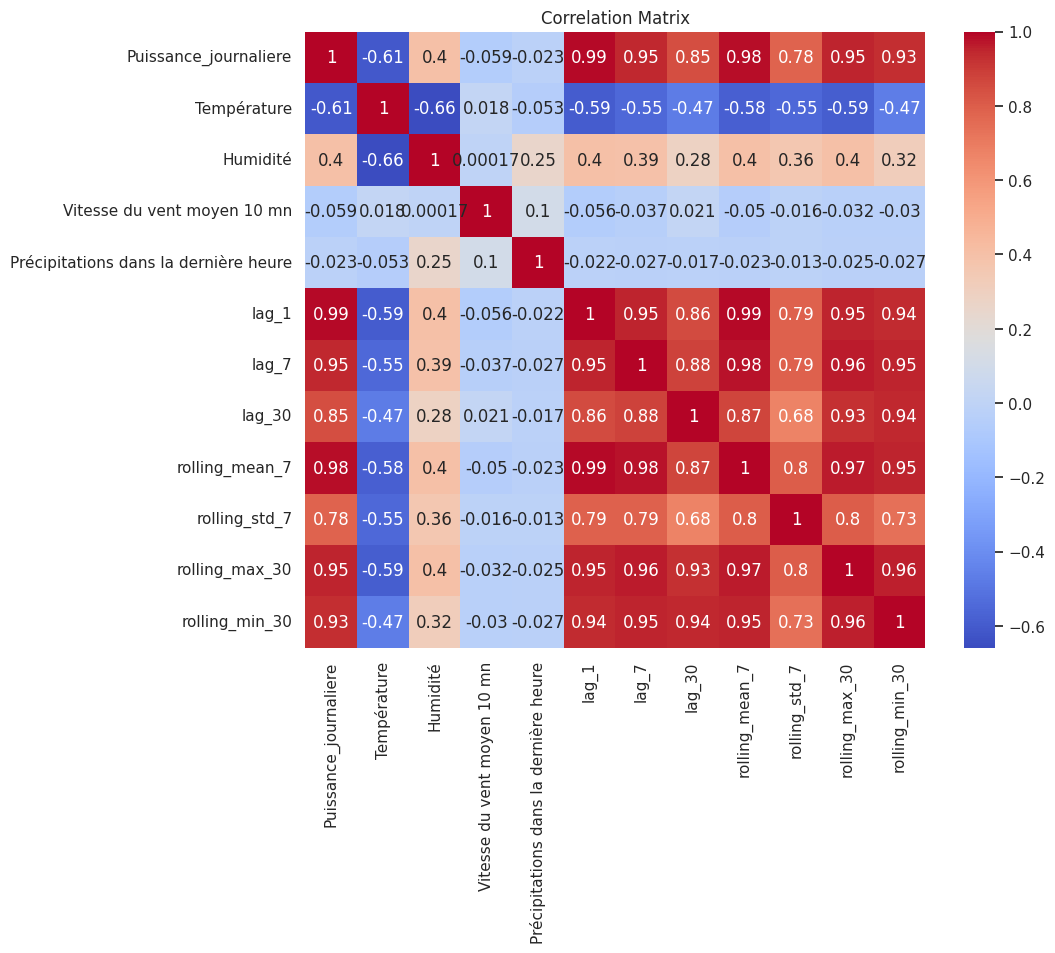

In [59]:
# Correlation matrix, with only numeric columns for correlation
numeric_cols = merged_df.select_dtypes(include=['number'])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(merged_df[['Puissance_journaliere', 'Température', 'Humidité', 'Vitesse du vent moyen 10 mn',
                                              'Précipitations dans la dernière heure', 'lag_1', 'lag_7', 'lag_30',
                                              'rolling_mean_7', 'rolling_std_7', 'rolling_max_30', 'rolling_min_30']])

In [54]:
# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
y.shape

(1735,)

# Building LSTM Model

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam

def build_improved_lstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(100, return_sequences=True, input_shape=input_shape)),
        BatchNormalization(),
        Dropout(0.2),
        Bidirectional(LSTM(100, return_sequences=True)),
        BatchNormalization(),
        Dropout(0.2),
        Bidirectional(LSTM(100)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(50, activation ='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

model = build_improved_lstm_model((X_train.shape[1], X_train.shape[2]))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Training : Early Stopping and Learning Rate Scheduling

In [64]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 1.1905 - val_loss: 0.1060 - learning_rate: 0.0010
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2943 - val_loss: 0.0954 - learning_rate: 0.0010
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.2029 - val_loss: 0.1313 - learning_rate: 0.0010
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1458 - val_loss: 0.1072 - learning_rate: 0.0010
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1368 - val_loss: 0.0500 - learning_rate: 0.0010
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1029 - val_loss: 0.0498 - learning_rate: 0.0010
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0888 - val_loss: 0.0409 - learning_rate: 0.0010
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0816 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0554 - val_loss: 0.0302 - learning_rate: 0.0010
Epoch 10/2

# Model Evaluation and Visualization

In [60]:
X.shape

(1735, 60, 12)

There are X.shape[-1] features.

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


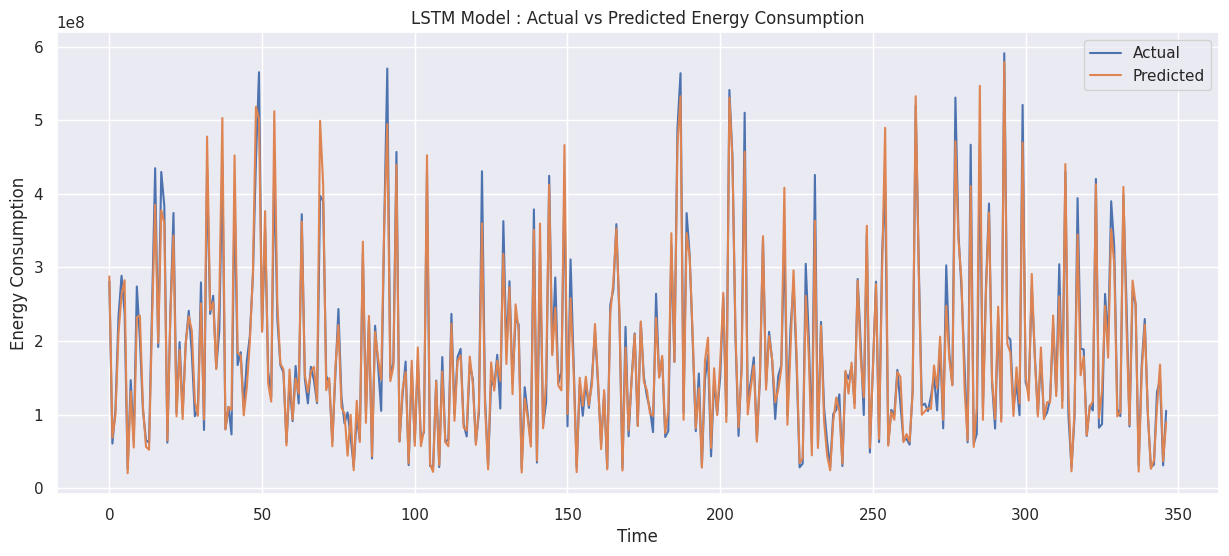

In [65]:
import matplotlib.pyplot as plt

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions
train_predictions = scaler.inverse_transform(np.concatenate((train_predictions, np.zeros((len(train_predictions), X.shape[-1] - 1))), axis=1))[:, 0]
test_predictions = scaler.inverse_transform(np.concatenate((test_predictions, np.zeros((len(test_predictions), X.shape[-1] - 1))), axis=1))[:, 0]
y_train_actual = scaler.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.zeros((len(y_train), X.shape[-1] - 1))), axis=1))[:, 0]
y_test_actual = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), X.shape[-1] - 1))), axis=1))[:, 0]

# Visualize predictions
plt.figure(figsize=(15, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(test_predictions, label = 'Predicted')
plt.title('LSTM Model : Actual vs Predicted Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

In [66]:
# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_actual, test_predictions)
mae = mean_absolute_error(y_test_actual, test_predictions)
r2 = r2_score(y_test_actual, test_predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 511472321823467.7
Mean Absolute Error: 15545128.062976195
R-squared Score: 0.9663764453684025


# Results

Overall, the results obtained are good, especially the R². For a global prediction requirement, the model is acceptable.

To increase accuracy, i.e. reduce MAE, adjustments are possible, such as hyperparameter optimization (Dropout, BatchNorm).